<a href="https://colab.research.google.com/github/turgutguvenc/-MSE-and-RMSE-perform/blob/main/02_end_to_end_machine_learning_project_MY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 2 – End-to-end Machine Learning project**

**Frame the Problem**

* The first question to ask your boss is what exactly the business objective is. Building a model is probably not the end goal. How does the company expect to use and benefit from this model? Knowing the objective is important because it will determine how you frame the problem, which algoritms you will select, which performance measure you will use to evaluate your model, and how much effort you will spend tweaking it.

* Your boss anwers that your model's output (a prediction of a district's median housing price) will be fed to another machine learning  system along with many other signals.(A piece of information fed to a ML system is often called signal.) This downstream system will determine whether it is worth with investing in given area. They have property experts they are doing estimates and their estimates were of 30 % percent.


* First determine what kind of training supervision the model need: is it a supervised, unsupervised, semi-supervised, self-supervised, or reinforcement learning task? Ans is it a classification task, a regression task, or something else? Should I use batch learning or online learning technuiques? 

* Typical supervised task(labeled examples)


* it is typical regression task since model will be asked to predict a value. More specifically, this is a multiple regression problem since the system will use multiple features to make a prediction.

* It is also a univariate regression problem since we are only trying to predict a single value for each district. If we were trying to predict a multiple values per district, it would be a multivariate regression problem.

* Finally there is no continous flow of data coming into the system, there is no particular need to adjust to changing data rapidly, and the data is small enough to fit in memory, so plain batch learning should do just fine.

* Tip: IF the data were huge, you could either split your batch learning work across multiple servers ( using MapReduce technique) or use an online learning technique.

**Select the Performance Measure**

* For regression problems a typical performance measure is RMSE

**Check the Assunptions**

* Lastly, it is good practice to list and verify the assumptions that have been made so far (by you or others) this can help you catch serious issues early on.

**Download the Data**

*Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.*

In [11]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [12]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

**Take a Quick Look at the Data Structure**

In [13]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Quick glimpse**:
total_bedrooms has missing values, expect ocean_proximity all values are numerical.

In [15]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [16]:
housing.describe() # it ignores all null values

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


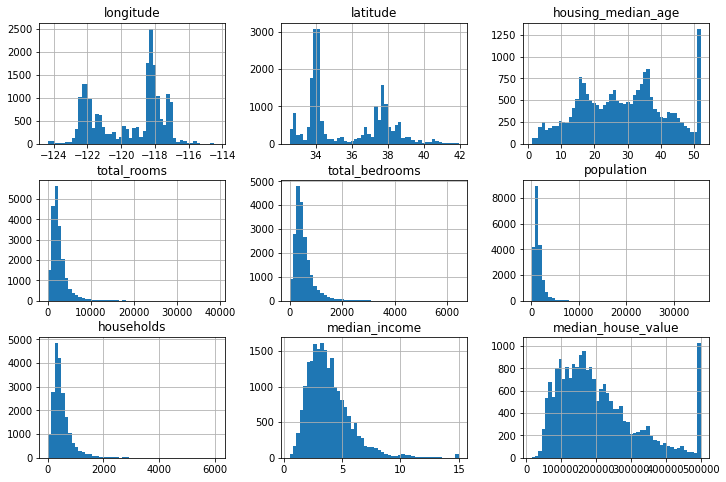

In [17]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize = (12,8))
plt.show()

** looking those hostograms**
* First; median income attribute doesnot look li it is expressed in US dollars.(they scaled yhe incomes)

*  The housing median age and the median house value were also capped.( business department dont mind this capped values that okay because our model output these values. otherwise we have two options; 1-Collect proper labels for districts whose labels capped.
2- Remove those capped districts from training and test set. 

* These attributes have very different scales. 

* Finally many histograms skewed right: they extend much farther to the right of the median than to the left. This may make it a bit harder for some ML algoritms. 

In [18]:
# extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

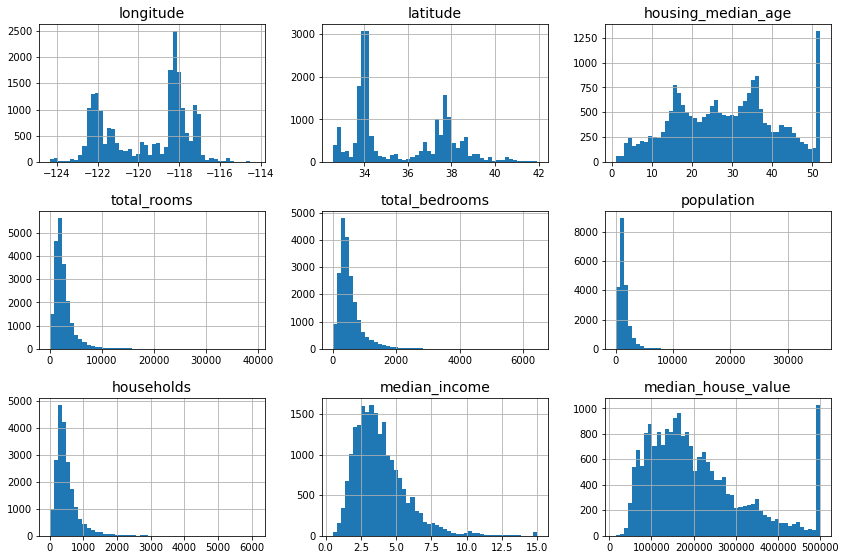

In [20]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

In [21]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
  # Randomly permute a sequence.
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [22]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)

16512

In [23]:
len(test_set)

4128

To ensure that this notebook's outputs remain the same every time we run it, we need to set the random seed: you should use it before np.random.permutation(x) func. when you use it. However whenever you fetch uptaded data set it will break.

In [24]:
np.random.seed(42)

Sadly, this won't guarantee that this notebook will output exactly the same results as in the book, since there are other possible sources of variation. The most important is the fact that algorithms get tweaked over time when libraries evolve. So please tolerate some minor differences: hopefully, most of the outputs should be the same, or at least in the right ballpark.

Note: another source of randomness is the order of Python sets: it is based on Python's hash() function, which is randomly "salted" when Python starts up (this started in Python 3.3, to prevent some denial-of-service attacks). To remove this randomness, the solution is to set the PYTHONHASHSEED environment variable to "0" before Python even starts up. Nothing will happen if you do it after that. Luckily, if you're running this notebook on Colab, the variable is already set for you.

* These codes ensures that test set will remain consistent across multiple  runs, even if you refresh the dataset. 

In [25]:
# PAGE 57
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [26]:
housing_with_id = housing.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

In [27]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

* First there is random_state parameter that allows you you to set the random generator seed. Second you can pass ot multiple datasets with an identical number of rows, and it will split them on the same indices.

In [28]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

* So far we have considered purely random sampling methods. This is generally fine if your dataset is large enough(espacially relative to number of attributes) but if it is not, you run the risk of introducing a significant samoling bias.

In [29]:
test_set["total_bedrooms"].isnull().sum()

44

In [30]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins =[0., 1.5, 3.0, 4.5,5., np.inf],
                               labels=[1, 2, 3, 4, 5])

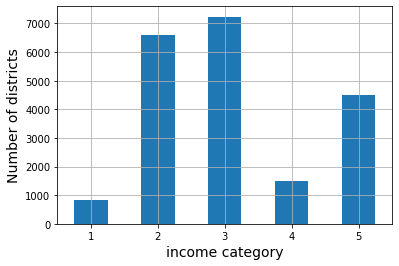

In [31]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("income category")
plt.ylabel("Number of districts")
plt.show()

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size= 0.2, random_state=42)

strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])
    # we have 10 diffrent stratified splits of the same dataset

In [43]:
# for no we can use fisrt split
strat_train_set, strat_test_set = strat_splits[0]

* This way shoerter and easy use it if it works.

In [44]:
# It's much shorter  way to get a single stratified split:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [48]:
# Income category proportion set...
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
5    0.217539
4    0.073159
1    0.039971
Name: income_cat, dtype: float64

* As you can see in the below the test set generated using stratified sampling has imvome catefory proportions almost identical to those in the full dataset. whereas the test generated using purely random sampling is skewed.

In [49]:
# extra code – computes the data for Figure 2–10

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,7.33,7.32,7.78,-0.13,6.15
5,21.75,21.75,22.72,0.02,4.48


In [50]:
# we wont use the income_cat column again, so you might as well drop it.
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

In [51]:
housing = strat_train_set.copy()

## Visualizing Geographical Data
* Because data set includes geoprical information(latitude, longitude ) it is a  good idea to create scatterplot of all the districts to visualize the daya. 

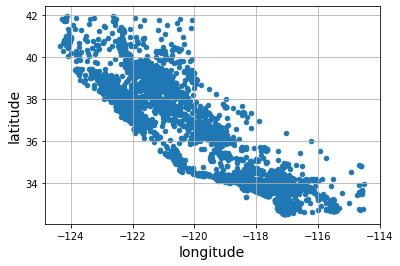

In [52]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

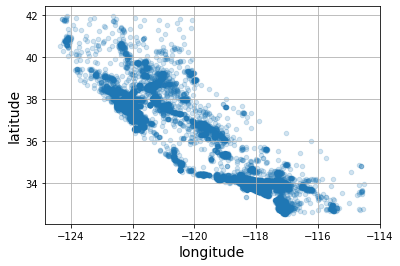

In [54]:
## setting alpha = 0.2 makes it much easier to visualize the places whereis high density
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

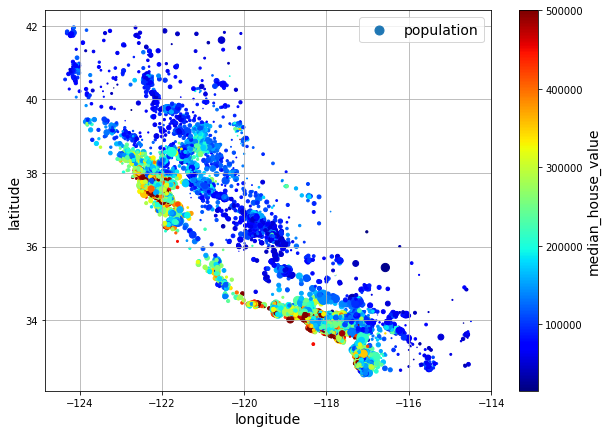

In [55]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] /100, label="population",
             c= "median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

plt.show()

The argument sharex=False fixes a display bug: without it, the x-axis values and label are not displayed (see: https://github.com/pandas-dev/pandas/issues/10611).

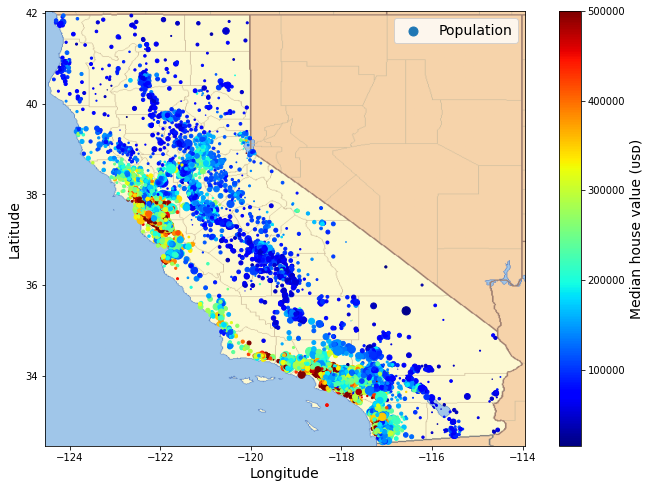

In [58]:
# extra code – this cell generates the first figure in the chapter

# Download the California image
filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

save_fig("california_housing_prices_plot")
plt.show()